# **Replication of the study by Nathan Nunn (2008)**

### **IV Group Members:**
* Colon, Christopher
* Rodriguez Quinto, Anel
* Stevens, Madison
* Stutts, Charlie
* Xu, Davis


**The article can be found here:** https://www.jstor.org/stable/25098896

**The dataset of the paper can be found here:** https://nathannunn.arts.ubc.ca/data/

**The Google Colab project can be found here:** https://colab.research.google.com/drive/19Rc1VzFgVn_KXGHygORPp26AeBBzToUl#scrollTo=KIyK8PmmytZ8

### **Setting Up the Environment for the Instrumental Variable Analysis of Slave Trade Impact on Economic Growth**

This script prepares the environment to estimate an instrumental variable (IV) analysis to investigate the impact of the historical slave trade on economic performance. It utilizes the linearmodels library to implement IV regression models, addressing endogeneity concerns. The code begins by installing necessary dependencies, including linearmodels. It then clones a GitHub repository containing the required dataset and navigates to the repository directory to load the dataset into a pandas DataFrame.

In [2]:
#Install and import the necessary libraries
!pip install linearmodels

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from statsmodels.sandbox.regression.gmm import IV2SLS
import linearmodels.iv.model as lm
from tabulate import tabulate

# Clone the repository
!git clone https://github.com/ECMT-680-Financial-Econometrics/IV-Group-Slave-Trade.git

# Navigate to the repository directory
%cd IV-Group-Slave-Trade

# Load the data from the cloned repository
df = pd.read_csv('slave_trade_QJE_New_Data.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.3 MB/s eta 0:00:00
Cloning into 'IV-Group-Slave-Trade'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 143 (delta 56), reused 16 (delta 16), pack-reused 43
Receiving objects: 100% (143/143), 1.49 MiB | 3.22 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/IV-Group-Slave-Trade


# **Table 3: OLS Regressions**

In this first section, we replicate the different OLS models used in the paper.

### **Comparative Analysis of OLS Regressions with Varying Control Variables**

This code conducts Ordinary Least Squares (OLS) regressions on the dataset, comparing models with different sets of control variables. The regressions aim to analyze the relationship between ln_maddison_pcgdp2000 (natural logarithm of GDP per capita in 2000) and various predictor variables. The script fits multiple OLS models with different combinations of control variables and extracts coefficients, standard errors, and p-values for each model. Finally, it presents the results in a tabular format with informative styling for easy interpretation.

In [3]:
# Table 3: OLS regression with and without controls
X1 = sm.add_constant(df[['ln_export_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X2 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X4 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X5 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])

# Fit the models
model1 = sm.OLS(df['ln_maddison_pcgdp2000'], X1).fit()
model2 = sm.OLS(df['ln_maddison_pcgdp2000'], X2).fit()
model4 = sm.OLS(df['ln_maddison_pcgdp2000'], X4).fit()
model5 = sm.OLS(df['ln_maddison_pcgdp2000'], X5).fit()

# Extract coefficients and other statistics for the specified variables
variables = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp',
             'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n',
             'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop']

results = []

# Populate the results list
for var in variables:
    row_values = {'Variable': var}
    for i, model in enumerate([model1, model2, model4, model5]):
        if var in model.params:
            coefficient = round(model.params[var], 3)
            std_error = round(model.bse[var], 3)
            p_value = round(model.pvalues[var], 3)
            std_p_value = f"{std_error} ({p_value})"
            row_values[f'Model {i+1} Coefficient'] = coefficient
            row_values[f'Model {i+1} Std. Error (P-value)'] = std_p_value
        else:
            row_values[f'Model {i+1} Coefficient'] = ''
            row_values[f'Model {i+1} Std. Error (P-value)'] = ''
    results.append(row_values)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Convert NaN values to empty strings
results_df = results_df.replace({np.nan: ''})

# Convert the DataFrame to a tabular format with fancy styling
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)


╒═════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╕
│ Variable                │ Model 1 Coefficient   │ Model 1 Std. Error (P-value)   │ Model 2 Coefficient   │ Model 2 Std. Error (P-value)   │ Model 3 Coefficient   │ Model 3 Std. Error (P-value)   │   Model 4 Coefficient │ Model 4 Std. Error (P-value)   │
╞═════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╡
│ ln_export_area          │ -0.112                │ 0.024 (0.0)                    │ -0.076                │ 0.029 (0.013)                  │ -0.085                │ 0.035 (0.02)                   │                -0.103 │ 0.034 (0.

# **Table 4: IV and 2SLS**

In this section, we replicate the IV analysis for the three different models presented in the paper.

## **Instrumental Variable Analysis**

**Model 1: Instrumental Variable Analysis without Controls**


This code conducts an IV analysis through a two-stage least squares (2SLS) regression to address endogeneity concerns in econometric analysis. In the first stage, it predicts the endogenous variable (ln_export_area) using instrumental variables (atlantic_distance_minimum, indian_distance_minimum, saharan_distance_minimum, and red_sea_distance_minimum). Coefficients and standard errors are then extracted and presented in a tabular format. These results provide insights into the relationship between the endogenous variable and instrumental variables. In the second stage, the predicted values from the first stage are utilized as exogenous variables to examine the relationship between ln_export_area and ln_maddison_pcgdp2000. Coefficients and standard errors from this stage are also extracted and displayed, offering insights into the estimated effects of the variables under investigation.

In [4]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model1 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model1.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model1 = sm.OLS(df['ln_maddison_pcgdp2000'], exog_second_stage).fit()

In [5]:
# Extract coefficients and standard errors for the first stage
coefficients = first_stage_model1.params
std_errors = first_stage_model1.bse

# Create a DataFrame with coefficients and standard errors
first_stage_results_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values, 'Std. Error': std_errors.values})

# Round the numbers to three decimals
first_stage_results_df = first_stage_results_df.round(3)

# Print the name of the first stage
print("First Stage Results:")
# Print the table
print(tabulate(first_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model1.params
std_errors_second_stage = second_stage_model1.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

First Stage Results:
╒═══════════════════════════╤═══════════════╤══════════════╕
│ Variable                  │   Coefficient │   Std. Error │
╞═══════════════════════════╪═══════════════╪══════════════╡
│ const                     │        29.11  │        6.959 │
├───────────────────────────┼───────────────┼──────────────┤
│ atlantic_distance_minimum │        -1.314 │        0.357 │
├───────────────────────────┼───────────────┼──────────────┤
│ indian_distance_minimum   │        -1.095 │        0.38  │
├───────────────────────────┼───────────────┼──────────────┤
│ saharan_distance_minimum  │        -2.435 │        0.823 │
├───────────────────────────┼───────────────┼──────────────┤
│ red_sea_distance_minimum  │        -0.002 │        0.71  │
╘═══════════════════════════╧═══════════════╧══════════════╛

Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │   Coefficient │   Std. Error │
╞══════════════════════════╪═══════════════

**Model 2: Instrumental Variable Analysis with Colony Fixed Effects**

This code conducts instrumental variable (IV) analysis while incorporating colony fixed effects to account for unobserved heterogeneity. In the first stage, the endogenous variable (ln_export_area) is regressed on instrumental variables along with colony indicators. Coefficients and standard errors are extracted and presented in a tabular format. Predicted values from the first stage are utilized in the second stage, where the relationship between ln_export_area and ln_maddison_pcgdp2000 is explored. Coefficients and standard errors from this stage are also extracted and presented in a similar tabular format. These analyses contribute to understanding the impact of the transatlantic slave trade while considering the influence of colony-specific characteristics.

In [6]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model2 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model2.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model2 = sm.OLS(df['ln_maddison_pcgdp2000'], exog_second_stage).fit()


In [7]:
# Extract coefficients and standard errors for the first stage
coefficients = first_stage_model2.params
std_errors = first_stage_model2.bse

# Create a DataFrame with coefficients and standard errors
first_stage_results_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values, 'Std. Error': std_errors.values})

# Round the numbers to three decimals
first_stage_results_df = first_stage_results_df.round(3)

# Exclude colony variables from the first stage results table
first_stage_results_df = first_stage_results_df[~first_stage_results_df['Variable'].str.startswith('colony')]

# Add "Colony Fixed Effects" to the first stage results table
colony_fixed_effects_row = pd.DataFrame({'Variable': ['Colony Fixed Effects'], 'Coefficient': ['Yes'], 'Std. Error': ['']})
first_stage_results_df = pd.concat([first_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Print the name of the first stage
print("First Stage Results:")
# Print the table
print(tabulate(first_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model2.params
std_errors_second_stage = second_stage_model2.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Exclude colony variables from the second stage results table
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].str.startswith('colony')]

# Add "Colony Fixed Effects" to the second stage results table
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


First Stage Results:
╒═══════════════════════════╤═══════════════╤══════════════╕
│ Variable                  │ Coefficient   │ Std. Error   │
╞═══════════════════════════╪═══════════════╪══════════════╡
│ const                     │ 42.363        │ 12.189       │
├───────────────────────────┼───────────────┼──────────────┤
│ atlantic_distance_minimum │ -1.741        │ 0.425        │
├───────────────────────────┼───────────────┼──────────────┤
│ indian_distance_minimum   │ -1.426        │ 0.531        │
├───────────────────────────┼───────────────┼──────────────┤
│ saharan_distance_minimum  │ -3.001        │ 1.049        │
├───────────────────────────┼───────────────┼──────────────┤
│ red_sea_distance_minimum  │ -0.152        │ 0.813        │
├───────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects      │ Yes           │              │
╘═══════════════════════════╧═══════════════╧══════════════╛

Second Stage Results:
╒══════════════════════════╤═════════════

**Model 3: Instrumental Variable Analysis with Colony Fixed Effects and Geography Controls**

This script conducts instrumental variable (IV) analysis while incorporating colony fixed effects and additional geography controls to address endogeneity concerns. In the first stage, the endogenous variable (ln_export_area) is regressed on instrumental variables, colony indicators, and geography controls. Coefficients and standard errors are extracted and presented in a tabular format. Predicted values from the first stage are then utilized in the second stage, where the relationship between ln_export_area and ln_maddison_pcgdp2000 is explored. Similar to the first stage, coefficients and standard errors are extracted and presented in a tabular format. These analyses provide insights into the impact of both historical and geographical factors on economic outcomes, contributing to a comprehensive understanding of the underlying relationships.

In [8]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum',
                             'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                             'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model3 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model3.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                        'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model3 = sm.OLS(df['ln_maddison_pcgdp2000'], exog_second_stage).fit()

In [9]:
# Extract first stage results
coefficients_first_stage = first_stage_model3.params.round(3)
std_errors_first_stage = first_stage_model3.bse.round(3)

# Define variables to exclude
exclude_variables = ['colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']

# Create first stage results DataFrame
first_stage_results_df = pd.DataFrame({'Variable': coefficients_first_stage.index,
                                       'Coefficient': coefficients_first_stage.values,
                                       'Std. Error': std_errors_first_stage.values})

# Exclude specified variables
first_stage_results_df = first_stage_results_df[~first_stage_results_df['Variable'].isin(exclude_variables)]

# Add "Colony Fixed Effects" row
colony_fixed_effects_row = pd.DataFrame({'Variable': ['Colony Fixed Effects'], 'Coefficient': ['Yes'], 'Std. Error': ['']})
first_stage_results_df = pd.concat([first_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Add "Geography Controls" row
geography_controls_row = pd.DataFrame({'Variable': ['Geography Controls'], 'Coefficient': ['Yes'], 'Std. Error': ['']})
first_stage_results_df = pd.concat([first_stage_results_df, geography_controls_row], ignore_index=True)

# Print first stage table
print("\nFirst Stage Results:")
print(tabulate(first_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Extract second stage results
coefficients_second_stage = second_stage_model3.params.round(3)
std_errors_second_stage = second_stage_model3.bse.round(3)

# Create second stage results DataFrame
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index,
                                        'Coefficient': coefficients_second_stage.values,
                                        'Std. Error': std_errors_second_stage.values})

# Exclude specified variables
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].isin(exclude_variables)]

# Add "Colony Fixed Effects" row
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Add "Geography Controls" row
second_stage_results_df = pd.concat([second_stage_results_df, geography_controls_row], ignore_index=True)

# Print second stage table
print("\nSecond Stage Results:")
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))



First Stage Results:
╒═══════════════════════════╤═══════════════╤══════════════╕
│ Variable                  │ Coefficient   │ Std. Error   │
╞═══════════════════════════╪═══════════════╪══════════════╡
│ const                     │ 42.288        │ 19.336       │
├───────────────────────────┼───────────────┼──────────────┤
│ atlantic_distance_minimum │ -1.316        │ 0.761        │
├───────────────────────────┼───────────────┼──────────────┤
│ indian_distance_minimum   │ -1.081        │ 0.697        │
├───────────────────────────┼───────────────┼──────────────┤
│ saharan_distance_minimum  │ -1.139        │ 1.595        │
├───────────────────────────┼───────────────┼──────────────┤
│ red_sea_distance_minimum  │ -1.221        │ 1.82         │
├───────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects      │ Yes           │              │
├───────────────────────────┼───────────────┼──────────────┤
│ Geography Controls        │ Yes           │              │
╘═

## **Figures**

In this section, we re-create the main figures of the paper.

### **Visualization of Relationships in Slave Trade and Economic Development**

This script generates visualizations to explore the relationships between historical slave exports and various economic and demographic factors. The first plot (Figure 3) depicts the relationship between the logarithm of slave exports normalized by land area and the logarithm of real per capita GDP in 2000. Figure 4 illustrates the association between the logarithm of population density in 1400 and slave exports. Figure 6 explores the relationship between slave exports and ethnic fractionalization, while Figure 7 examines the link between slave exports and nineteenth-century state development. Each plot employs regression analysis to visualize the trends and correlations between the variables, providing insights into the historical implications of the transatlantic slave trade on economic and social factors.

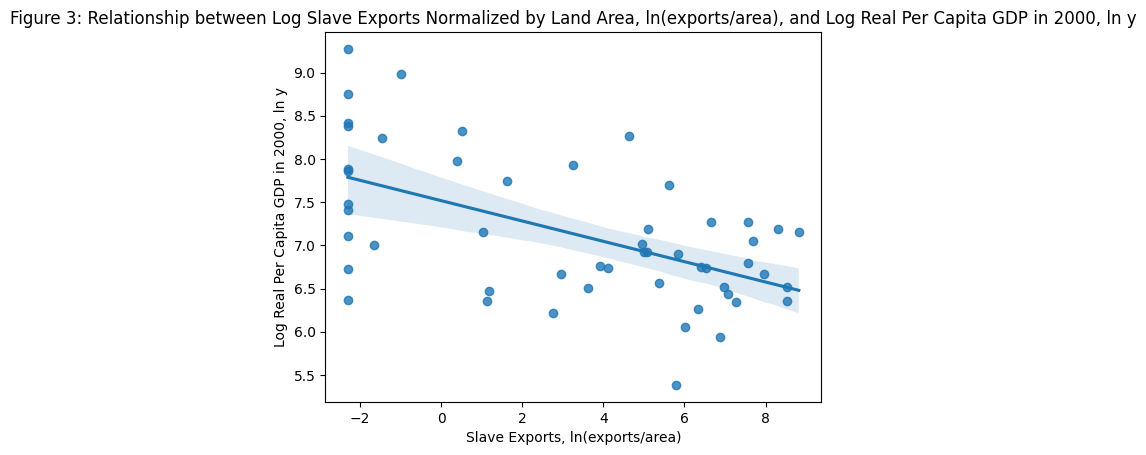

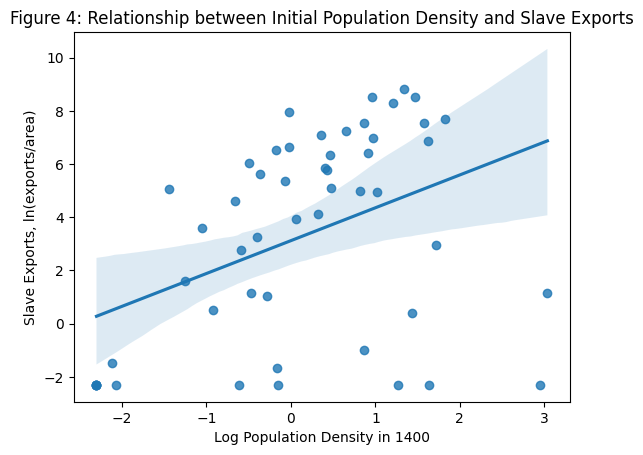

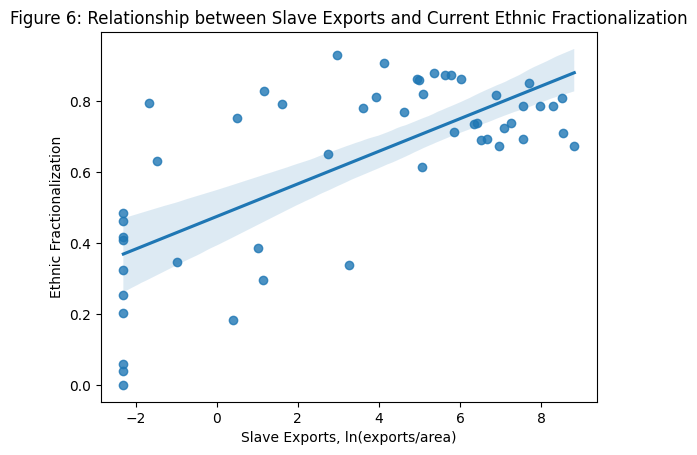

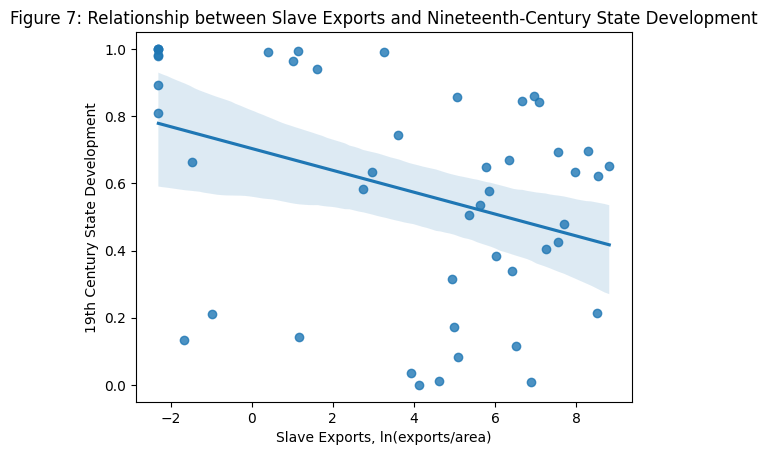

In [10]:
# Figure 3: Relationship between slaves exported per area and GDP
sns.regplot(x='ln_export_area', y='ln_maddison_pcgdp2000', data=df)
plt.title('Figure 3: Relationship between Log Slave Exports Normalized by Land Area, ln(exports/area), and Log Real Per Capita GDP in 2000, ln y')
plt.xlabel('Slave Exports, ln(exports/area)')
plt.ylabel('Log Real Per Capita GDP in 2000, ln y')
plt.show()

# Figure 4: Relationship between ln_pop_dens_1400 and slaves exported per area
sns.regplot(x='ln_pop_dens_1400', y='ln_export_area', data=df)
plt.title('Figure 4: Relationship between Initial Population Density and Slave Exports')
plt.xlabel('Log Population Density in 1400')
plt.ylabel('Slave Exports, ln(exports/area)')
plt.show()

# Figure 6: Relationship between slaves exported per area and Ethnic Fractionalization
sns.regplot(x='ln_export_area', y='ethnic_fractionalization', data=df)
plt.title('Figure 6: Relationship between Slave Exports and Current Ethnic Fractionalization')
plt.xlabel('Slave Exports, ln(exports/area)')
plt.ylabel('Ethnic Fractionalization')
plt.show()

# Figure 7: Relationship between slaves exported per area and Nineteenth-Century State Development
sns.regplot(x='ln_export_area', y='state_dev', data=df)
plt.title('Figure 7: Relationship between Slave Exports and Nineteenth-Century State Development')
plt.xlabel('Slave Exports, ln(exports/area)')
plt.ylabel('19th Century State Development')
plt.show()


# **Replicating the models with new GDP data**

In this section, we replicate the OLS models and the IV models using GDP data from 2001 and 2022 and an average for the period 2001 - 2022.

## **GDP 2001**

### OLS Regressions

This script conducts Ordinary Least Squares (OLS) regressions to analyze the relationship between 2001 economic growth (gdp01) and various predictor variables, with and without controls. Three models are fitted, each incorporating different sets of control variables. The predictors include factors such as ln_export_area, geographical coordinates, climate indicators, demographic characteristics, and regional features. Coefficients, standard errors, and p-values are extracted and presented in a tabular format, facilitating a comparative analysis of the effects of different control variables on economic growth estimates. These analyses contribute to understanding the drivers of economic development and inform policy decisions aimed at promoting sustainable growth.

In [11]:
# Table 3: OLS regression with and without controls
X1 = sm.add_constant(df[['ln_export_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X2 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X4 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])

# Fit the models
model1_gdp01 = sm.OLS(df['gpd01'], X1).fit()
model2_gdp01 = sm.OLS(df['gpd01'], X2).fit()
model4_gdp01 = sm.OLS(df['gpd01'], X4).fit()

# Extract coefficients and other statistics for the specified variables
variables = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp',
             'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n',
             'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop']

results = []

# Populate the results list
for var in variables:
    row_values = {'Variable': var}
    for i, model in enumerate([model1_gdp01, model2_gdp01, model4_gdp01]):
        if var in model.params:
            coefficient = round(model.params[var], 3)
            std_error = round(model.bse[var], 3)
            p_value = round(model.pvalues[var], 3)
            std_p_value = f"{std_error} ({p_value})"
            row_values[f'Model {i+1} Coefficient'] = coefficient
            row_values[f'Model {i+1} Std. Error (P-value)'] = std_p_value
        else:
            row_values[f'Model {i+1} Coefficient'] = ''
            row_values[f'Model {i+1} Std. Error (P-value)'] = ''
    results.append(row_values)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Convert NaN values to empty strings
results_df = results_df.replace({np.nan: ''})

# Convert the DataFrame to a tabular format with fancy styling
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)


╒═════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╕
│ Variable                │ Model 1 Coefficient   │ Model 1 Std. Error (P-value)   │ Model 2 Coefficient   │ Model 2 Std. Error (P-value)   │ Model 3 Coefficient   │ Model 3 Std. Error (P-value)   │
╞═════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╡
│ ln_export_area          │ -0.115                │ 0.029 (0.0)                    │ -0.093                │ 0.036 (0.013)                  │ -0.101                │ 0.046 (0.034)                  │
├─────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┤
│ abs

### IV and 2SLS

**Model 1: Instrumental Variable Analysis without Controls**

This script implements an IV analysis to estimate the relationship between 2001 economic growth (gdp01) and the endogenous variable ln_export_area, instrumented with atlantic_distance_minimum, indian_distance_minimum, saharan_distance_minimum, and red_sea_distance_minimum. In the first stage, the endogenous variable is regressed on the instrumental variables, and the predicted values are used in the second stage regression. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format, providing insights into the estimated effects of ln_export_area on economic growth. These results contribute to understanding the causal relationship between slave exports and economic development, accounting for potential endogeneity.

In [13]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model1 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model1.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model1_gdp01 = sm.OLS(df['gpd01'], exog_second_stage).fit()

In [14]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model1_gdp01.params
std_errors_second_stage = second_stage_model1_gdp01.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │   Coefficient │   Std. Error │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │         7.933 │        0.218 │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │        -0.263 │        0.057 │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 2: Instrumental Variable Analysis with Colony Fixed Effects**

This script performs an IV analysis with colony controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables and colony indicators. The predicted values from the first stage are then utilized in the second stage regression, where the economic growth variable gdp01 is regressed on the predicted ln_export_area, along with colony indicators. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. These results provide insights into the impact of ln_export_area on economic growth while controlling for potential endogeneity and colony-specific effects.

In [15]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model2 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model2.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model2_gdp01 = sm.OLS(df['gpd01'], exog_second_stage).fit()


In [16]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model2_gdp01.params
std_errors_second_stage = second_stage_model2_gdp01.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Exclude colony variables from the second stage results table
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].str.startswith('colony')]

# Add "Colony Fixed Effects" to the second stage results table
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 9.651         │ 0.713        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.23         │ 0.046        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 3: Instrumental Variable Analysis with Colony Fixed Effects and Geography Controls**

This code conducts an IV analysis with colony and geography controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables, including geographical factors and colony indicators. Predicted values of ln_export_area are then generated. Subsequently, in the second stage, the economic growth variable gdp01 is regressed on the predicted ln_export_area, along with colony indicators and additional geographical control variables. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. This analysis allows for an examination of the impact of ln_export_area on economic growth while addressing endogeneity concerns and controlling for relevant geographical and colonial factors.

In [17]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum',
                             'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                             'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model3 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model3.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                        'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model3_gdp01 = sm.OLS(df['gpd01'], exog_second_stage).fit()

In [18]:
# Extract second stage results
coefficients_second_stage = second_stage_model3_gdp01.params.round(3)
std_errors_second_stage = second_stage_model3_gdp01.bse.round(3)

# Create second stage results DataFrame
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index,
                                        'Coefficient': coefficients_second_stage.values,
                                        'Std. Error': std_errors_second_stage.values})

# Exclude specified variables
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].isin(exclude_variables)]

# Add "Colony Fixed Effects" row
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Add "Geography Controls" row
second_stage_results_df = pd.concat([second_stage_results_df, geography_controls_row], ignore_index=True)

# Print second stage table
print("\nSecond Stage Results:")
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 12.074        │ 1.739        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.41         │ 0.113        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
├──────────────────────────┼───────────────┼──────────────┤
│ Geography Controls       │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


## **GDP 2022**

### OLS Regressions

This script conducts Ordinary Least Squares (OLS) regressions to analyze the relationship between 2022 economic growth (gdp22) and various predictor variables, with and without controls. Three models are fitted, each incorporating different sets of control variables. The predictors include factors such as ln_export_area, geographical coordinates, climate indicators, demographic characteristics, and regional features. Coefficients, standard errors, and p-values are extracted and presented in a tabular format, facilitating a comparative analysis of the effects of different control variables on economic growth estimates. These analyses contribute to understanding the drivers of economic development and inform policy decisions aimed at promoting sustainable growth.

In [19]:
# Table 3: OLS regression with and without controls
X1 = sm.add_constant(df[['ln_export_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X2 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X4 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])

# Fit the models
model1_gdp22 = sm.OLS(df['gdp22'], X1).fit()
model2_gdp22 = sm.OLS(df['gdp22'], X2).fit()
model4_gdp22 = sm.OLS(df['gdp22'], X4).fit()

# Extract coefficients and other statistics for the specified variables
variables = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp',
             'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n',
             'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop']

results = []

# Populate the results list
for var in variables:
    row_values = {'Variable': var}
    for i, model in enumerate([model1_gdp22, model2_gdp22, model4_gdp22]):
        if var in model.params:
            coefficient = round(model.params[var], 3)
            std_error = round(model.bse[var], 3)
            p_value = round(model.pvalues[var], 3)
            std_p_value = f"{std_error} ({p_value})"
            row_values[f'Model {i+1} Coefficient'] = coefficient
            row_values[f'Model {i+1} Std. Error (P-value)'] = std_p_value
        else:
            row_values[f'Model {i+1} Coefficient'] = ''
            row_values[f'Model {i+1} Std. Error (P-value)'] = ''
    results.append(row_values)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Convert NaN values to empty strings
results_df = results_df.replace({np.nan: ''})

# Convert the DataFrame to a tabular format with fancy styling
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)


╒═════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╕
│ Variable                │ Model 1 Coefficient   │ Model 1 Std. Error (P-value)   │ Model 2 Coefficient   │ Model 2 Std. Error (P-value)   │ Model 3 Coefficient   │ Model 3 Std. Error (P-value)   │
╞═════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╡
│ ln_export_area          │ -0.115                │ 0.029 (0.0)                    │ -0.083                │ 0.035 (0.023)                  │ -0.088                │ 0.044 (0.055)                  │
├─────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┤
│ abs

## IV and 2SLS

**Model 1: Instrumental Variable Analysis without Controls**

This script implements an IV analysis to estimate the relationship between 2022 economic growth (gdp22) and the endogenous variable ln_export_area, instrumented with atlantic_distance_minimum, indian_distance_minimum, saharan_distance_minimum, and red_sea_distance_minimum. In the first stage, the endogenous variable is regressed on the instrumental variables, and the predicted values are used in the second stage regression. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format, providing insights into the estimated effects of ln_export_area on economic growth. These results contribute to understanding the causal relationship between slave exports and economic development, accounting for potential endogeneity.

In [20]:
# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model1 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model1.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model1_gdp22 = sm.OLS(df['gdp22'], exog_second_stage).fit()

In [21]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model1_gdp22.params
std_errors_second_stage = second_stage_model1_gdp22.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │   Coefficient │   Std. Error │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │         8.155 │        0.211 │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │        -0.245 │        0.055 │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 2: Instrumental Variable Analysis with Colony Fixed Effects**

This script performs an IV analysis with colony controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables and colony indicators. The predicted values from the first stage are then utilized in the second stage regression, where the economic growth variable gdp22 is regressed on the predicted ln_export_area, along with colony indicators. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. These results provide insights into the impact of ln_export_area on economic growth while controlling for potential endogeneity and colony-specific effects.

In [22]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model2 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model2.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model2_gdp22 = sm.OLS(df['gdp22'], exog_second_stage).fit()


In [23]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model2_gdp22.params
std_errors_second_stage = second_stage_model2_gdp22.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Exclude colony variables from the second stage results table
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].str.startswith('colony')]

# Add "Colony Fixed Effects" to the second stage results table
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 9.349         │ 0.751        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.213        │ 0.048        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 3: Instrumental Variable Analysis with Colony Fixed Effects and Geography Controls**

This code conducts an IV analysis with colony and geography controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables, including geographical factors and colony indicators. Predicted values of ln_export_area are then generated. Subsequently, in the second stage, the economic growth variable gdp22 is regressed on the predicted ln_export_area, along with colony indicators and additional geographical control variables. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. This analysis allows for an examination of the impact of ln_export_area on economic growth while addressing endogeneity concerns and controlling for relevant geographical and colonial factors.




In [24]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum',
                             'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                             'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model3 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model3.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                        'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model3_gdp22 = sm.OLS(df['gdp22'], exog_second_stage).fit()

In [25]:
# Extract second stage results
coefficients_second_stage = second_stage_model3_gdp22.params.round(3)
std_errors_second_stage = second_stage_model3_gdp22.bse.round(3)

# Create second stage results DataFrame
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index,
                                        'Coefficient': coefficients_second_stage.values,
                                        'Std. Error': std_errors_second_stage.values})

# Exclude specified variables
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].isin(exclude_variables)]

# Add "Colony Fixed Effects" row
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Add "Geography Controls" row
second_stage_results_df = pd.concat([second_stage_results_df, geography_controls_row], ignore_index=True)

# Print second stage table
print("\nSecond Stage Results:")
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 11.013        │ 1.782        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.337        │ 0.116        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
├──────────────────────────┼───────────────┼──────────────┤
│ Geography Controls       │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


## **Average GDP 2001 - 2022**

### OLS Regressions

This script conducts Ordinary Least Squares (OLS) regressions to analyze the relationship between average GDP from 2001 to 2022 and various predictor variables, with and without controls. Three models are fitted, each incorporating different sets of control variables. The predictors include factors such as ln_export_area, geographical coordinates, climate indicators, demographic characteristics, and regional features. Coefficients, standard errors, and p-values are extracted and presented in a tabular format, facilitating a comparative analysis of the effects of different control variables on economic growth estimates. These analyses contribute to understanding the drivers of economic development and inform policy decisions aimed at promoting sustainable growth.

In [26]:
# Table 3: OLS regression with and without controls
X1 = sm.add_constant(df[['ln_export_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X2 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])
X4 = sm.add_constant(df[['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n',  'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']])

# Fit the models
model1_avg = sm.OLS(df['average_gdp_01_22'], X1).fit()
model2_avg = sm.OLS(df['average_gdp_01_22'], X2).fit()
model4_avg = sm.OLS(df['average_gdp_01_22'], X4).fit()

# Extract coefficients and other statistics for the specified variables
variables = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp',
             'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n',
             'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop']

results = []

# Populate the results list
for var in variables:
    row_values = {'Variable': var}
    for i, model in enumerate([model1_avg, model2_avg, model4_avg]):
        if var in model.params:
            coefficient = round(model.params[var], 3)
            std_error = round(model.bse[var], 3)
            p_value = round(model.pvalues[var], 3)
            std_p_value = f"{std_error} ({p_value})"
            row_values[f'Model {i+1} Coefficient'] = coefficient
            row_values[f'Model {i+1} Std. Error (P-value)'] = std_p_value
        else:
            row_values[f'Model {i+1} Coefficient'] = ''
            row_values[f'Model {i+1} Std. Error (P-value)'] = ''
    results.append(row_values)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Convert NaN values to empty strings
results_df = results_df.replace({np.nan: ''})

# Convert the DataFrame to a tabular format with fancy styling
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)


╒═════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╤═══════════════════════╤════════════════════════════════╕
│ Variable                │ Model 1 Coefficient   │ Model 1 Std. Error (P-value)   │ Model 2 Coefficient   │ Model 2 Std. Error (P-value)   │ Model 3 Coefficient   │ Model 3 Std. Error (P-value)   │
╞═════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╪═══════════════════════╪════════════════════════════════╡
│ ln_export_area          │ -0.114                │ 0.028 (0.0)                    │ -0.086                │ 0.035 (0.02)                   │ -0.087                │ 0.045 (0.061)                  │
├─────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┼───────────────────────┼────────────────────────────────┤
│ abs

## IV and 2SLS

**Model 1: Instrumental Variable Analysis without Controls**

This script implements an IV analysis to estimate the relationship between average GDP from 2001 to 2022 and the endogenous variable ln_export_area, instrumented with atlantic_distance_minimum, indian_distance_minimum, saharan_distance_minimum, and red_sea_distance_minimum. In the first stage, the endogenous variable is regressed on the instrumental variables, and the predicted values are used in the second stage regression. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format, providing insights into the estimated effects of ln_export_area on economic growth. These results contribute to understanding the causal relationship between slave exports and economic development, accounting for potential endogeneity.

In [27]:
# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model1 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model1.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model1_avg = sm.OLS(df['average_gdp_01_22'], exog_second_stage).fit()

In [28]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model1_avg.params
std_errors_second_stage = second_stage_model1_avg.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │   Coefficient │   Std. Error │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │         8.112 │        0.217 │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │        -0.259 │        0.056 │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 2: Instrumental Variable Analysis with Colony Fixed Effects**

This script performs an IV analysis with colony controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables and colony indicators. The predicted values from the first stage are then utilized in the second stage regression, where the economic growth variable average_gdp_01_22 is regressed on the predicted ln_export_area, along with colony indicators. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. These results provide insights into the impact of ln_export_area on economic growth while controlling for potential endogeneity and colony-specific effects.

In [29]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model2 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model2.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model2_avg = sm.OLS(df['average_gdp_01_22'], exog_second_stage).fit()


In [30]:
# Extract coefficients and standard errors for the second stage
coefficients_second_stage = second_stage_model2_avg.params
std_errors_second_stage = second_stage_model2_avg.bse

# Create a DataFrame with coefficients and standard errors for the second stage
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index, 'Coefficient': coefficients_second_stage.values, 'Std. Error': std_errors_second_stage.values})

# Round the numbers to three decimals
second_stage_results_df = second_stage_results_df.round(3)

# Exclude colony variables from the second stage results table
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].str.startswith('colony')]

# Add "Colony Fixed Effects" to the second stage results table
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Print the name of the second stage
print("\nSecond Stage Results:")
# Print the table
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 9.61          │ 0.723        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.221        │ 0.047        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


**Model 3: Instrumental Variable Analysis with Colony Fixed Effects and Geography Controls**

This code conducts an IV analysis with colony and geography controls. In the first stage, the endogenous variable ln_export_area is regressed on instrumental variables, including geographical factors and colony indicators. Predicted values of ln_export_area are then generated. Subsequently, in the second stage, the economic growth variable average_gdp_01_22 is regressed on the predicted ln_export_area, along with colony indicators and additional geographical control variables. Coefficients and standard errors for the second stage regression are extracted and presented in a tabular format. This analysis allows for an examination of the impact of ln_export_area on economic growth while addressing endogeneity concerns and controlling for relevant geographical and colonial factors.

In [31]:
import statsmodels.api as sm

# Step 1: First Stage Regression
# Define the endogenous variable (to be instrumented) and the instrument
endog_first_stage = df['ln_export_area']
instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum',
                             'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                             'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the instrument
instrument_first_stage = sm.add_constant(instrument_first_stage)

# Fit the first stage regression
first_stage_model3 = sm.OLS(endog_first_stage, instrument_first_stage).fit()

# Step 2: Predicted Values from First Stage
# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model3.predict()

# Step 3: Second Stage Regression
# Define the exogenous variable (including the predicted values from the first stage)
exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                        'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

# Add constant to the exogenous variables
exog_second_stage = sm.add_constant(exog_second_stage)

# Fit the second stage regression
second_stage_model3_avg = sm.OLS(df['average_gdp_01_22'], exog_second_stage).fit()

In [32]:
# Extract second stage results
coefficients_second_stage = second_stage_model3_avg.params.round(3)
std_errors_second_stage = second_stage_model3_avg.bse.round(3)

# Create second stage results DataFrame
second_stage_results_df = pd.DataFrame({'Variable': coefficients_second_stage.index,
                                        'Coefficient': coefficients_second_stage.values,
                                        'Std. Error': std_errors_second_stage.values})

# Exclude specified variables
second_stage_results_df = second_stage_results_df[~second_stage_results_df['Variable'].isin(exclude_variables)]

# Add "Colony Fixed Effects" row
second_stage_results_df = pd.concat([second_stage_results_df, colony_fixed_effects_row], ignore_index=True)

# Add "Geography Controls" row
second_stage_results_df = pd.concat([second_stage_results_df, geography_controls_row], ignore_index=True)

# Print second stage table
print("\nSecond Stage Results:")
print(tabulate(second_stage_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Second Stage Results:
╒══════════════════════════╤═══════════════╤══════════════╕
│ Variable                 │ Coefficient   │ Std. Error   │
╞══════════════════════════╪═══════════════╪══════════════╡
│ const                    │ 11.555        │ 1.752        │
├──────────────────────────┼───────────────┼──────────────┤
│ ln_export_area_predicted │ -0.366        │ 0.114        │
├──────────────────────────┼───────────────┼──────────────┤
│ Colony Fixed Effects     │ Yes           │              │
├──────────────────────────┼───────────────┼──────────────┤
│ Geography Controls       │ Yes           │              │
╘══════════════════════════╧═══════════════╧══════════════╛


# **Analyzing multiple years**

In this section, we re-estimate the model 3 of the original IV analysis for multiple years, in specific for the period 2001 - 2022, in order to see how different is the coefficient of our interest variable "ln_export_area" when we use the GDP from different years.

### **Sequential Instrumental Variable Analysis with Colony and Geography Controls**

This code iterates through a list of dependent variables to conduct a sequential IV analysis. For each dependent variable, the first stage regression involves regressing the endogenous variable ln_export_area on instrumental variables, including geographical factors and colony indicators. Predicted values of ln_export_area are then generated. In the second stage, the respective dependent variable is regressed on the predicted ln_export_area, along with colony indicators and additional geographical control variables. This process is repeated for each dependent variable in the list. The coefficients and the confidence intervals for each second stage regression are extracted and printed for further analysis. This approach allows for an examination of the impact of ln_export_area on the economic performance of different years while addressing endogeneity concerns and controlling for relevant geographical and colonial factors.

In [50]:
import statsmodels.api as sm

# Define the list of variables for the second stage model
second_stage_variables = ['gdp00', 'gpd01', 'gdp02', 'gdp03', 'gdp04', 'gdp05', 'gdp06', 'gdp07', 'gdp08', 'gdp09', 'gdp10', 'gdp11', 'gdp12', 'gdp13', 'gdp14', 'gdp15','gdp16', 'gdp17', 'gdp18', 'gdp19', 'gdp20', 'gdp21', 'gdp22']

for dependent_variable in second_stage_variables:
    # Step 1: First Stage Regression
    # Define the endogenous variable (to be instrumented) and the instrument
    endog_first_stage = df['ln_export_area']
    instrument_first_stage = df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum',
                                 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                                 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

    # Add constant to the instrument
    instrument_first_stage = sm.add_constant(instrument_first_stage)

    # Fit the first stage regression
    first_stage_model = sm.OLS(endog_first_stage, instrument_first_stage).fit()

    # Step 2: Predicted Values from First Stage
    # Get the predicted values from the first stage
    df['ln_export_area_predicted'] = first_stage_model.predict()

    # Step 3: Second Stage Regression
    # Define the exogenous variable (including the predicted values from the first stage)
    exog_second_stage = df[['ln_export_area_predicted', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6',
                            'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]

    # Add constant to the exogenous variables
    exog_second_stage = sm.add_constant(exog_second_stage)

    # Fit the second stage regression
    second_stage_model = sm.OLS(df[dependent_variable], exog_second_stage).fit()

    # Get confidence intervals for the coefficients
    confidence_intervals = second_stage_model.conf_int()


In [51]:
import pandas as pd

# Define an empty list to store the coefficients and confidence intervals
coefficients_table = []

for dependent_variable in second_stage_variables:
    # Rest of the code remains the same as before

    # Fit the second stage regression
    second_stage_model = sm.OLS(df[dependent_variable], exog_second_stage).fit()

    # Extract the coefficient and confidence intervals of ln_export_area_predicted
    coefficient = second_stage_model.params['ln_export_area_predicted']
    ci_lower, ci_upper = second_stage_model.conf_int().loc['ln_export_area_predicted']

    # Store the coefficient and confidence intervals along with the dependent variable name
    coefficients_table.append({'Dependent Variable': dependent_variable,
                               'Coefficient': coefficient,
                               'Lower CI': ci_lower,
                               'Upper CI': ci_upper})

# Create a DataFrame from the coefficients list
coefficients_df = pd.DataFrame(coefficients_table)

# Round the results to 3 decimal places
coefficients_df = coefficients_df.round(3)

# Add a column representing years from 2000 to 2022
years = list(range(2000, 2023))
coefficients_df['Year'] = years

# Print the coefficients table
print(coefficients_df)


   Dependent Variable  Coefficient  Lower CI  Upper CI  Year
0               gdp00       -0.418    -0.647    -0.189  2000
1               gpd01       -0.410    -0.638    -0.181  2001
2               gdp02       -0.413    -0.643    -0.184  2002
3               gdp03       -0.393    -0.620    -0.167  2003
4               gdp04       -0.381    -0.608    -0.154  2004
5               gdp05       -0.378    -0.609    -0.147  2005
6               gdp06       -0.381    -0.613    -0.148  2006
7               gdp07       -0.388    -0.621    -0.155  2007
8               gdp08       -0.381    -0.613    -0.149  2008
9               gdp09       -0.376    -0.605    -0.148  2009
10              gdp10       -0.370    -0.601    -0.139  2010
11              gdp11       -0.377    -0.610    -0.144  2011
12              gdp12       -0.372    -0.606    -0.139  2012
13              gdp13       -0.357    -0.595    -0.119  2013
14              gdp14       -0.353    -0.593    -0.113  2014
15              gdp15   

### **Temporal Analysis of Coefficients for ln_export_area**

This code generates a plot visualizing the coefficients and the confidence intervals of ln_export_area_predicted over the years 2000 to 2022. The coefficients and IC, representing the impact of the independent variable on the economic perfomance, are plotted against the years. Each point on the plot corresponds to a specific year and the coefficient value for that year. This visualization helps in understanding how the impact of the independent variable on the economic growth changes over time.

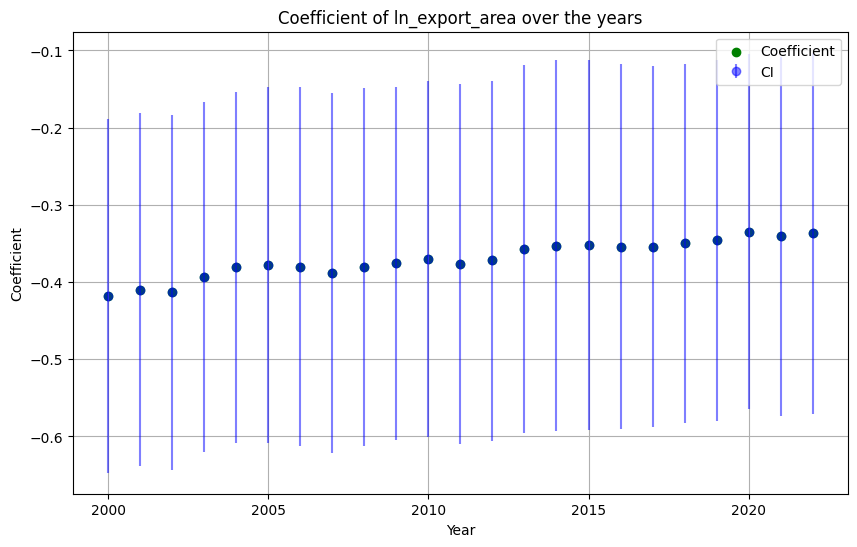

In [52]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot coefficients for each dependent variable
plt.scatter(coefficients_df['Year'], coefficients_df['Coefficient'], color='green', label='Coefficient')

# Adding error bars for confidence intervals
plt.errorbar(coefficients_df['Year'], coefficients_df['Coefficient'],
             yerr=[coefficients_df['Coefficient'] - coefficients_df['Lower CI'],
                   coefficients_df['Upper CI'] - coefficients_df['Coefficient']],
             fmt='o', color='blue', alpha=0.5, label='CI')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('Coefficient of ln_export_area over the years')
plt.grid(True)
plt.legend()

# Show plot
plt.show()
